In [37]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [38]:
# Read the data as a dataframe, which is stored in the new csv that is 'cleaned_data.csv'

df = pd.read_csv('cleaned_data.csv')


In [39]:
# First three records of the dataframe

df.head(3)

,life_expectancy,alcohol,hepatitis_b,measles,polio,diphtheria,hiv/aids
0,65.0,0.01,65.0,1154,6.0,65.0,0.1
1,59.9,0.01,62.0,492,58.0,62.0,0.1
2,59.9,0.01,64.0,430,62.0,64.0,0.1


In [40]:
# Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   life_expectancy  2938 non-null   float64
 1   alcohol          2938 non-null   float64
 2   hepatitis_b      2938 non-null   float64
 3   measles          2938 non-null   int64  
 4   polio            2938 non-null   float64
 5   diphtheria       2938 non-null   float64
 6   hiv/aids         2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


##### Split the dataframee into dependent and independent feature ,X is the independent features and y is dependent feature


In [41]:
X = df.drop(['life_expectancy'],axis=1)

y = df['life_expectancy']

##### Split data into training and testing set   


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [43]:
# Shape of the dataframe

X_train.shape,X_test.shape

((2056, 6), (882, 6))

In [44]:
X_train

,alcohol,hepatitis_b,measles,polio,diphtheria,hiv/aids
1641,7.14,86.0,1,72.0,72.0,0.1
618,2.03,92.0,146,62.0,62.0,5.9
406,4.55,92.0,54118,91.0,92.0,1.1
1094,3.57,86.0,0,85.0,86.0,5.7
1788,0.26,85.0,1088,84.0,86.0,0.6
...,...,...,...,...,...,...
1638,6.91,82.0,3,96.0,96.0,0.1
1095,3.21,83.0,26,82.0,83.0,5.9
1130,6.08,92.0,0,62.0,63.0,2.7
1294,9.30,95.0,10982,97.0,96.0,0.1


In [45]:
y_train

1641    80.0
618     55.3
406     56.9
1094    57.1
1788    64.5
        ... 
1638    87.0
1095    56.7
1130    61.8
1294    79.9
860     59.4
Name: life_expectancy, Length: 2056, dtype: float64

In [46]:
# Import model training and performance metrics Libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
# Function for calculated performance metrices

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    R2_score = r2_score(true,predicted)
    return mae,mse,R2_score


In [48]:
# Dictionary format of different algorithms

models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=False),
}

model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    # Evaluate test dataset

    model_mae, model_mse, model_r2 = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print('--- Model performance ---')
    print("- Mean Squared Error: {:.3f}".format(model_mse))
    print("- Mean Absolute Error: {:.3f}".format(model_mae))
    print("- R2 Score: {:.4f}".format(model_r2))
    
    print('\n')
   

Linear Regression
--- Model performance ---
- Mean Squared Error: 39.393
- Mean Absolute Error: 4.935
- R2 Score: 0.5787


Decision Tree
--- Model performance ---
- Mean Squared Error: 23.401
- Mean Absolute Error: 3.244
- R2 Score: 0.7497




Random Forest
--- Model performance ---
- Mean Squared Error: 12.839
- Mean Absolute Error: 2.557
- R2 Score: 0.8627


CatBoost Regressor
--- Model performance ---
- Mean Squared Error: 13.564
- Mean Absolute Error: 2.730
- R2 Score: 0.8549




#### As we seen above the calculated performance of the model Linear Regressor is 57.87 , Decision Tree Regressor is 75.40 , Random Forest Regressor is 86.21 and CatBoost Regressor is 85.49 . Random Forest Regressor gives us better result than all the others so we use Random Forest as further process or model training and predictions.

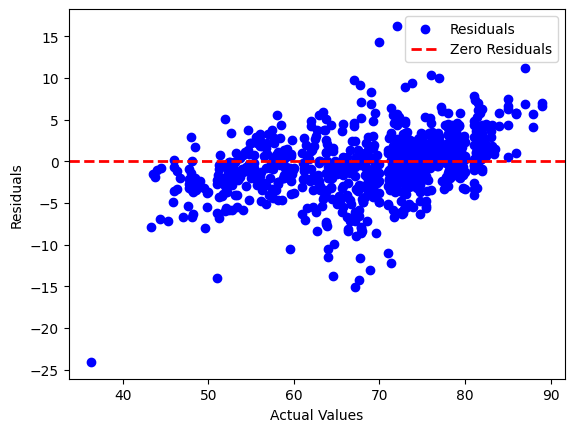

In [49]:
final_model = RandomForestRegressor()

final_model.fit(X_train,y_train)
y_pred_final = final_model.predict(X_test)


residuals = y_test - y_pred_final

plt.scatter(y_test,residuals, color='blue',label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth = 2, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [50]:
predictions = final_model.predict(X_test)

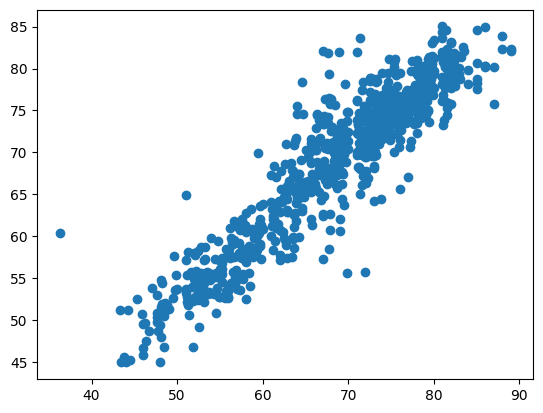

In [51]:
plt.scatter(y_test,predictions)

In [52]:
import pickle

# Save the model
with open('model.pkl','wb') as file:
    pickle.dump(final_model, file)

In [53]:
with open('model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [54]:
# Create a new data point

new_data = np.array([[17,18,19,20,21,22]])

# Make a prediction
prediction1 = loaded_model.predict(new_data)
print(prediction1)

[54.144]


In [55]:
# Make another prediction

new_data = np.array([[19,99,90000,99,99,49]])
prediction2 = loaded_model.predict(new_data)
print(prediction2)

[50.251]


In [56]:
# Make another prediction

new_data = np.array([[7,29,9000,19,39,9]])
prediction3 = loaded_model.predict(new_data)
print(prediction3)

[52.983]
